# 1. Mount Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls -la "/content/gdrive/My Drive/darknet"

total 44
drwx------ 2 root root 4096 May 15 05:14 AppleCustom_Yolo3_backup
drwx------ 2 root root 4096 May 14 09:33 AppleCustom_Yolo4_backup
drwx------ 2 root root 4096 May  9 00:41 apple_detection_dataset
drwx------ 2 root root 4096 May  3 15:02 bin
drwx------ 2 root root 4096 May  6 14:33 cfg
drwx------ 2 root root 4096 May  3 14:38 cuDNN
drwx------ 2 root root 4096 May  9 10:49 custom
drwx------ 2 root root 4096 May  6 14:33 data
drwx------ 2 root root 4096 May 14 04:11 FruitCustom_Yolo3_backup
drwx------ 2 root root 4096 May 13 16:19 FruitCustom_Yolo4_backup
drwx------ 2 root root 4096 May  3 15:07 weights


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [3]:
import os
# Colab에 설치되어 있는 CUDA 버전에 맞는 cuDNN을 구글 드라이브로부터 압축 해제해서 /usr/local/으로 복사
if not os.path.exists('/usr/local/cuda/include/cudnn.h'):
    !tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-11.0-linux-x64-v8.0.5.39.tgz -C /usr/local/
    !chmod a+r /usr/local/cuda/include/cudnn.h

# cuDNN 버전 확인
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2    

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.5
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.5
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.5
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.5
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.5
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.5
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

## 3. Load DarkNet

In [4]:
# Colab VM에 darknet 폴더를 만든다.
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [5]:
# 1.Verify that the compiled Darknet exists in the Google drive.
!ls -la '/content/gdrive/My Drive/darknet/bin/darknet'

# 2.Copy the Darknet compiled version to the VM
!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# 3.Set execution permissions
!chmod +x ./darknet

-rw------- 1 root root 6516872 May 11 06:18 '/content/gdrive/My Drive/darknet/bin/darknet'


# 4. Test Yolo

In [6]:
# 내 구글 드라이브에 있는 필요한 파일을 VM으로 가져온다.
!cp -r '/content/gdrive/My Drive/darknet/weights' .
!cp -r '/content/gdrive/My Drive/darknet/cfg' .
!cp -ar '/content/gdrive/My Drive/darknet/data' .
!cp -r '/content/gdrive/My Drive/darknet/apple_detection_dataset' .

# VM의 darknet 폴더에 backup 폴더를 만든다.
if not os.path.exists('./backup'):
    os.makedirs('./backup')
    
%ls

apple_detection_dataset/  backup/  cfg/  darknet*  data/  weights/


In [20]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF


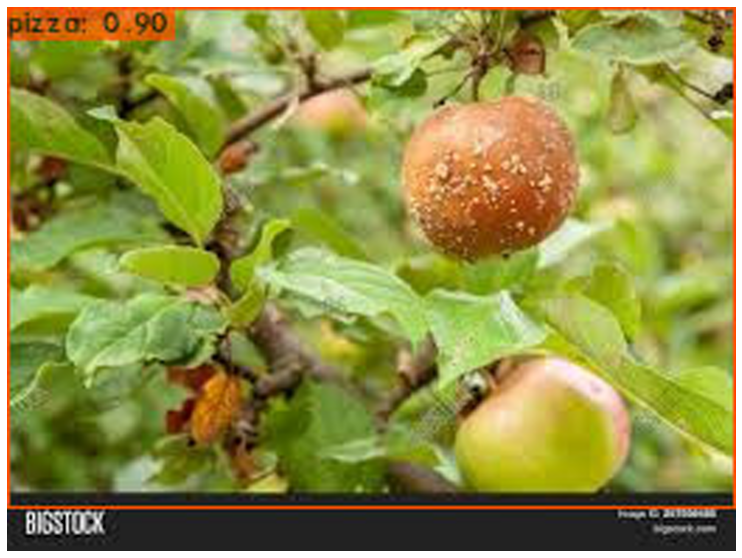

In [21]:
!./darknet detect cfg/yolov4.cfg weights/yolov4.weights "/content/darknet/apple_detection_dataset/apple_dataset/validation/images/damaged_apple (271).jpg"
imShow('predictions.jpg')
# download('predictions.jpg')

# 5. Custom Yolo Training and Test

In [22]:
!./darknet detector train apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg weights/yolov4.conv.137 -dont_show -map 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.822696), count: 5, class_loss = 1.644220, iou_loss = 21.245356, total_loss = 22.889576 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.855958), count: 32, class_loss = 2.344244, iou_loss = 32.955189, total_loss = 35.299435 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.850649), count: 32, class_loss = 1.082836, iou_loss = 9.166133, total_loss = 10.248969 
 total_bbox = 3094980, rewritten_bbox = 0.016446 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000238, iou_loss = 0.000000, total_loss = 0.000238 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.900729), count: 6, class_loss = 0.000303, iou_loss = 4.868544, total_loss = 4.868847 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) 

In [23]:
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_final.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [24]:
# 학습된 weight 파일 성능 측정(mAP)
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_last.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [25]:
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_4000.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [26]:
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_3000.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [27]:
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_2000.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [28]:
!./darknet detector map apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/train/images/apple-train-yolo4.cfg backup/apple-train-yolo4_1000.weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

In [29]:
# 성능(mAP)이 가장 좋은 weight만 남겨 두고 구글 드라이브에 복사해 둔다.
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/My Drive/darknet/AppleCustom_Yolo4_backup"  

In [12]:
# 학습하지 않고 실행 할 경우에만 사용
#!cp -r "/content/gdrive/My Drive/darknet/AppleCustom_Yolo4_backup/apple-train-yolo4_final.weights" ./backup

In [30]:
!ls -al ./backup

total 1750292
drwxr-xr-x 3 root root      4096 May 15 08:58 .
drwxr-xr-x 8 root root      4096 May 15 07:09 ..
-rw-r--r-- 1 root root 256037520 May 15 07:34 apple-train-yolo4_1000.weights
-rw-r--r-- 1 root root 256037520 May 15 08:01 apple-train-yolo4_2000.weights
-rw-r--r-- 1 root root 256037520 May 15 08:29 apple-train-yolo4_3000.weights
-rw-r--r-- 1 root root 256037520 May 15 08:58 apple-train-yolo4_4000.weights
-rw-r--r-- 1 root root 256037520 May 15 07:50 apple-train-yolo4_best.weights
-rw-r--r-- 1 root root 256037520 May 15 08:58 apple-train-yolo4_final.weights
-rw-r--r-- 1 root root 256037520 May 15 08:58 apple-train-yolo4_last.weights
drwxr-xr-x 2 root root      4096 May 15 07:05 .ipynb_checkpoints


 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


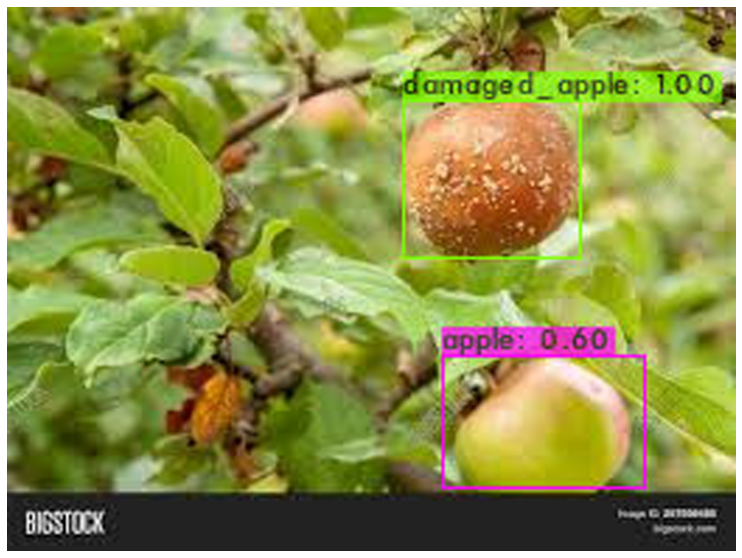

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Custom Yolo Test
!./darknet detector test apple_detection_dataset/apple_dataset/train/images/custom_data.data apple_detection_dataset/apple_dataset/validation/images/apple-test-yolo4.cfg backup/apple-train-yolo4_final.weights "/content/darknet/apple_detection_dataset/apple_dataset/validation/images/damaged_apple (271).jpg" -dont-show

imShow('predictions.jpg')
download('predictions.jpg')